In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("the motherlode.csv")
df.head()

,csa_name_mod2,company_id,company_name,shifts_worked,adjusted_head_count,fill_rate,industry_name,avg_head_count,avg_hourly_wage,avg_shift_lead,2023_rev,avg_days_between_shifts,total_head_count,year_quarter_comp_start
0,"Salt Lake City-Provo-Orem, UT",3,Warehouse Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019Q1
1,"Salt Lake City-Provo-Orem, UT",4,Bacon Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018Q4
2,All Other Markets Combined,4,Bacon Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018Q4
3,"Salt Lake City-Provo-Orem, UT",9,Bacon Inc,1.0,1.0,1.0,Entertainment,1.0,20.0,7.1333,48.0,NaN,2.0,2019Q1
4,All Other Markets Combined,9,Bacon Inc,1.0,1.0,1.0,Entertainment,1.0,20.0,7.1333,48.0,NaN,2.0,2019Q1


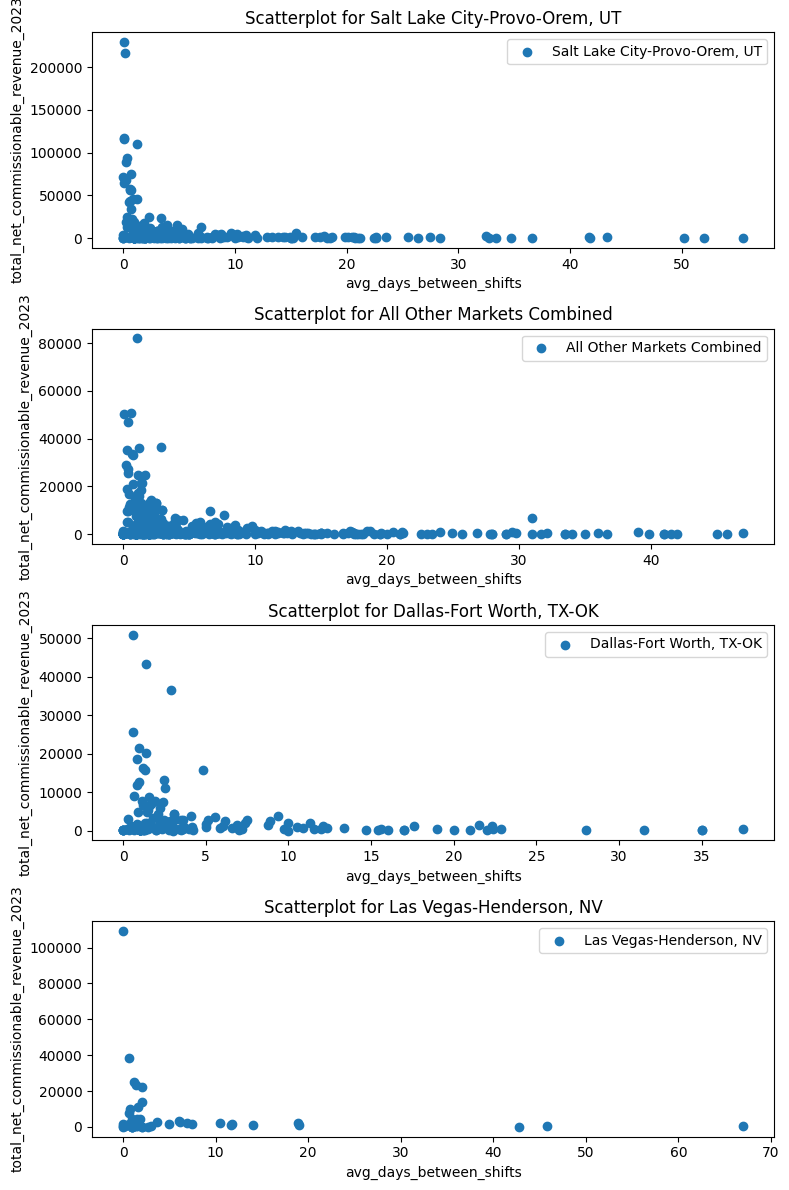

In [12]:
# Define a criterion for outlier removal (e.g., using z-scores)
z_threshold = 2 

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Remove outliers based on z-scores (adjust the criterion as needed)
    z_scores = ((subset['avg_days_between_shifts'] - subset['avg_days_between_shifts'].mean()) / subset['avg_days_between_shifts'].std()).abs()
    subset_no_outliers = subset[z_scores < z_threshold]

    # Create scatterplot with adjusted axis limits
    axes[i].scatter(subset_no_outliers['avg_days_between_shifts'], subset_no_outliers['total_net_commissionable_revenue_2023'], label=factor)
    axes[i].set_title(f'Scatterplot for {factor}')
    axes[i].set_xlabel('avg_days_between_shifts')
    axes[i].set_ylabel('total_net_commissionable_revenue_2023')
    axes[i].legend()
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

# Assuming 'df' is your DataFrame with explanatory and response variables
# X variables
explanatory_vars = ['average_head_count', 'average_hourly_wage', 'average_shift_lead', 'avg_days_between_shifts']

# Y variables
response_vars = ['total_net_commissionable_revenue_2023', 'fill_rate', 'shifts_worked']

# Extract the subset of the DataFrame with the specified variables
selected_vars = explanatory_vars + response_vars
subset_df = df[selected_vars]

# Compute the correlation coefficient matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                                       average_head_count  \
average_head_count                               1.000000   
average_hourly_wage                             -0.077332   
average_shift_lead                               0.039246   
avg_days_between_shifts                          0.000949   
total_net_commissionable_revenue_2023            0.187566   
fill_rate                                       -0.377156   
shifts_worked                                    0.259253   

                                       average_hourly_wage  \
average_head_count                               -0.077332   
average_hourly_wage                               1.000000   
average_shift_lead                                0.028159   
avg_days_between_shifts                           0.127735   
total_net_commissionable_revenue_2023            -0.068435   
fill_rate                                         0.031253   
shifts_worked                                    -0.112697   

              

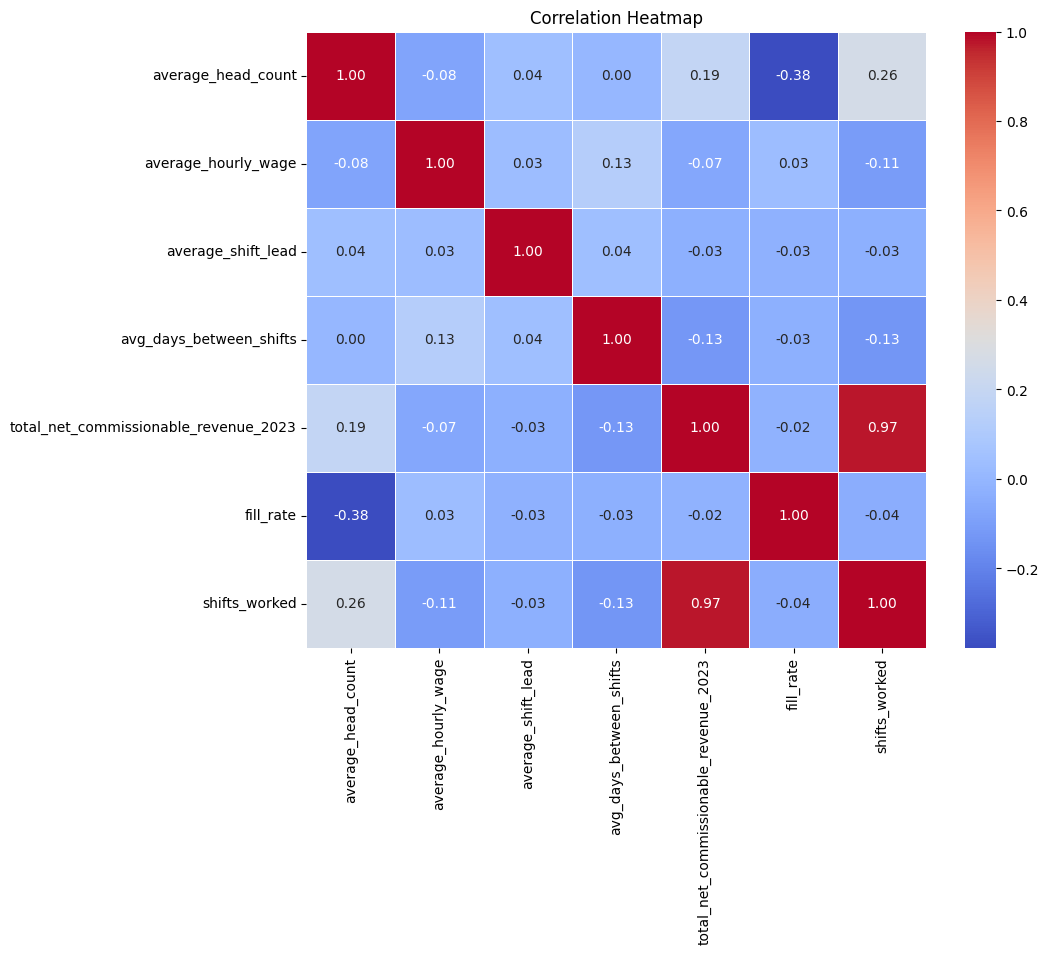

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with explanatory and response variables
# X variables
explanatory_vars = ['average_head_count', 'average_hourly_wage', 'average_shift_lead', 'avg_days_between_shifts']

# Y variables
response_vars = ['total_net_commissionable_revenue_2023', 'fill_rate', 'shifts_worked']

# Extract the subset of the DataFrame with the specified variables
selected_vars = explanatory_vars + response_vars
subset_df = df[selected_vars]

# Compute the correlation coefficient matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


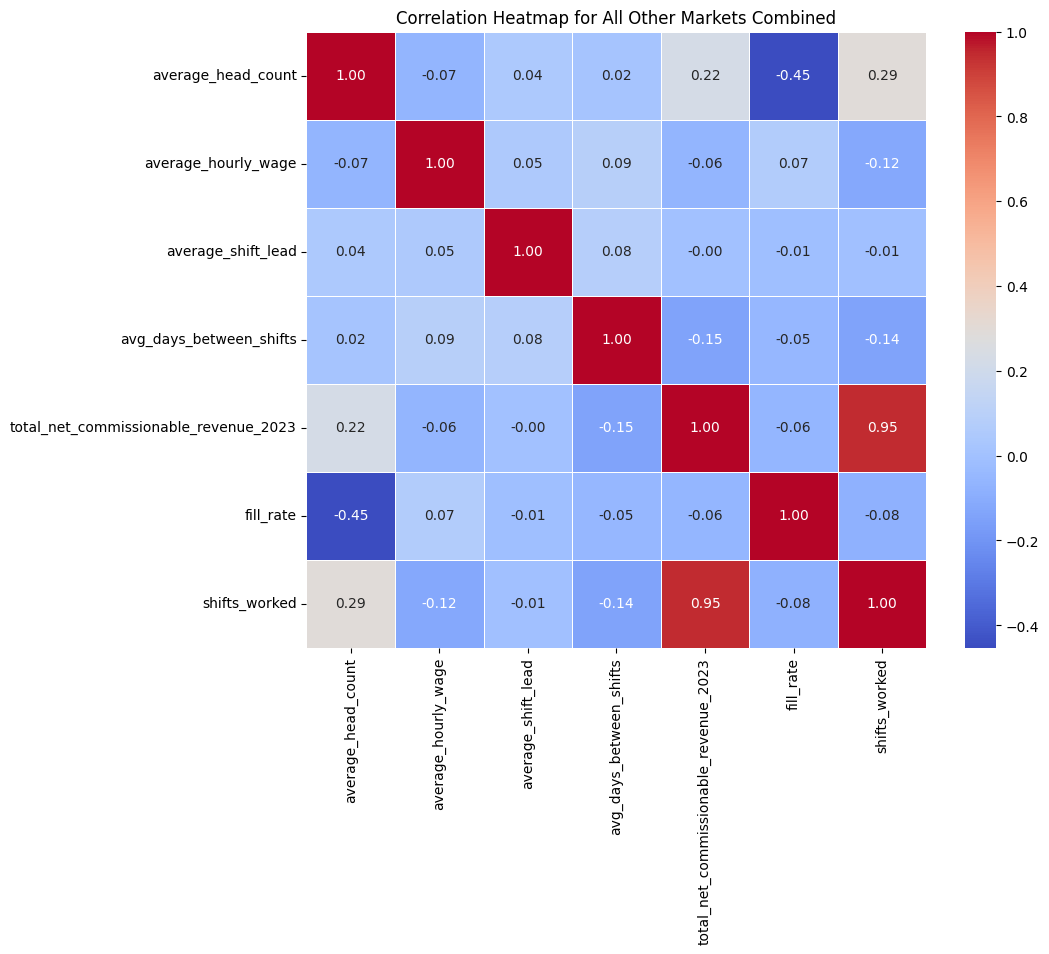

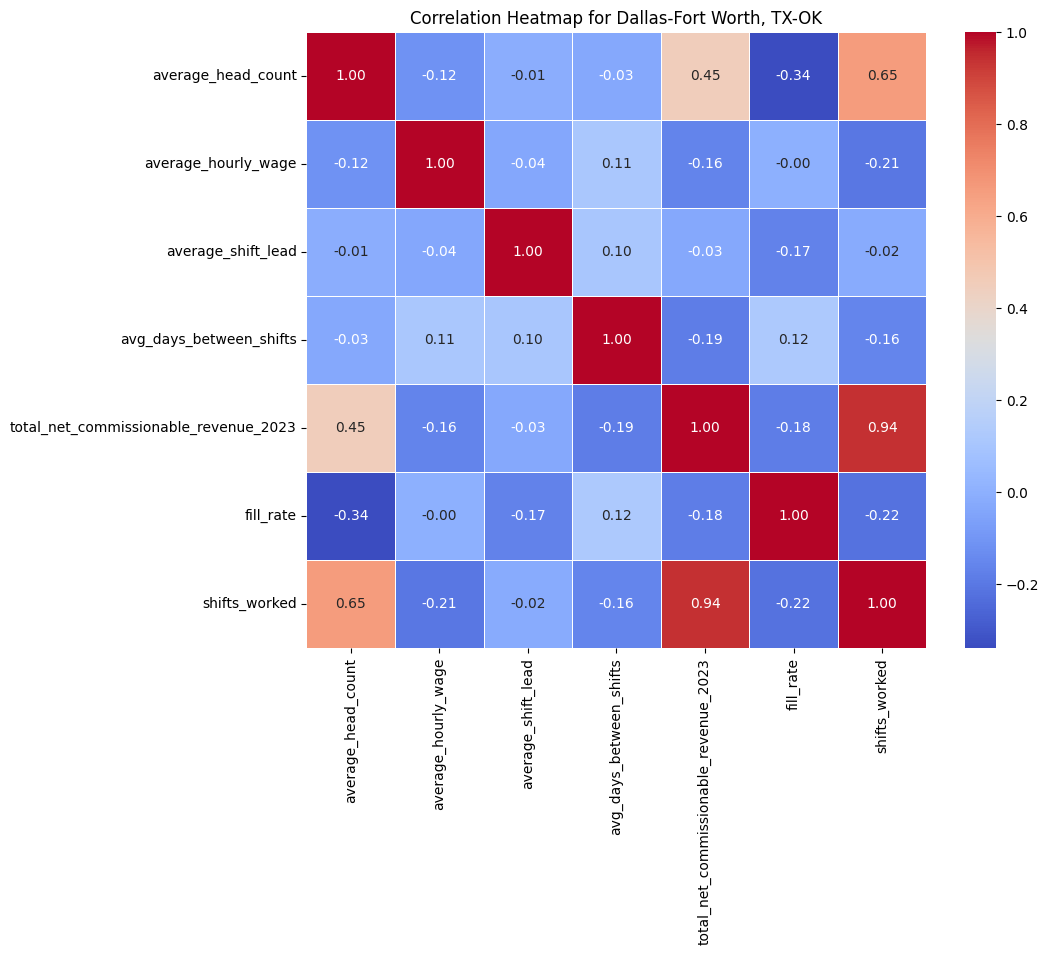

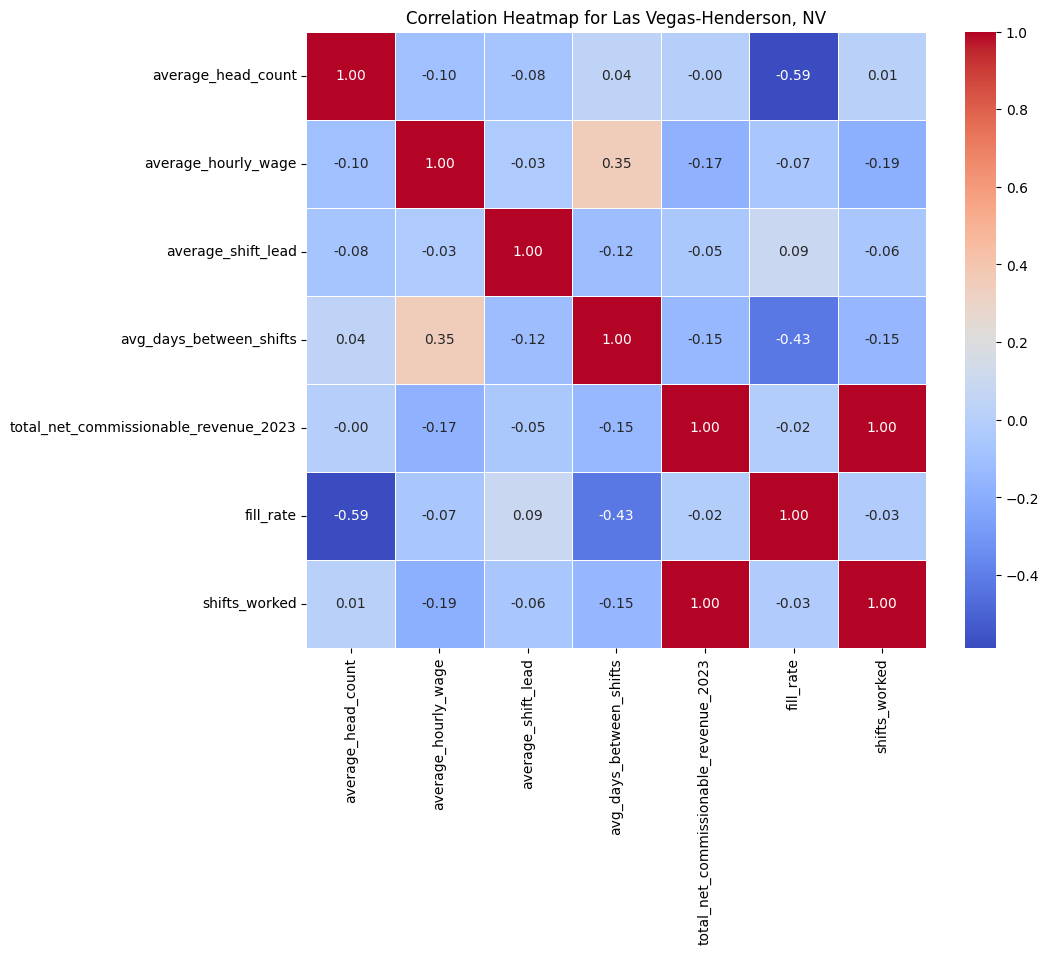

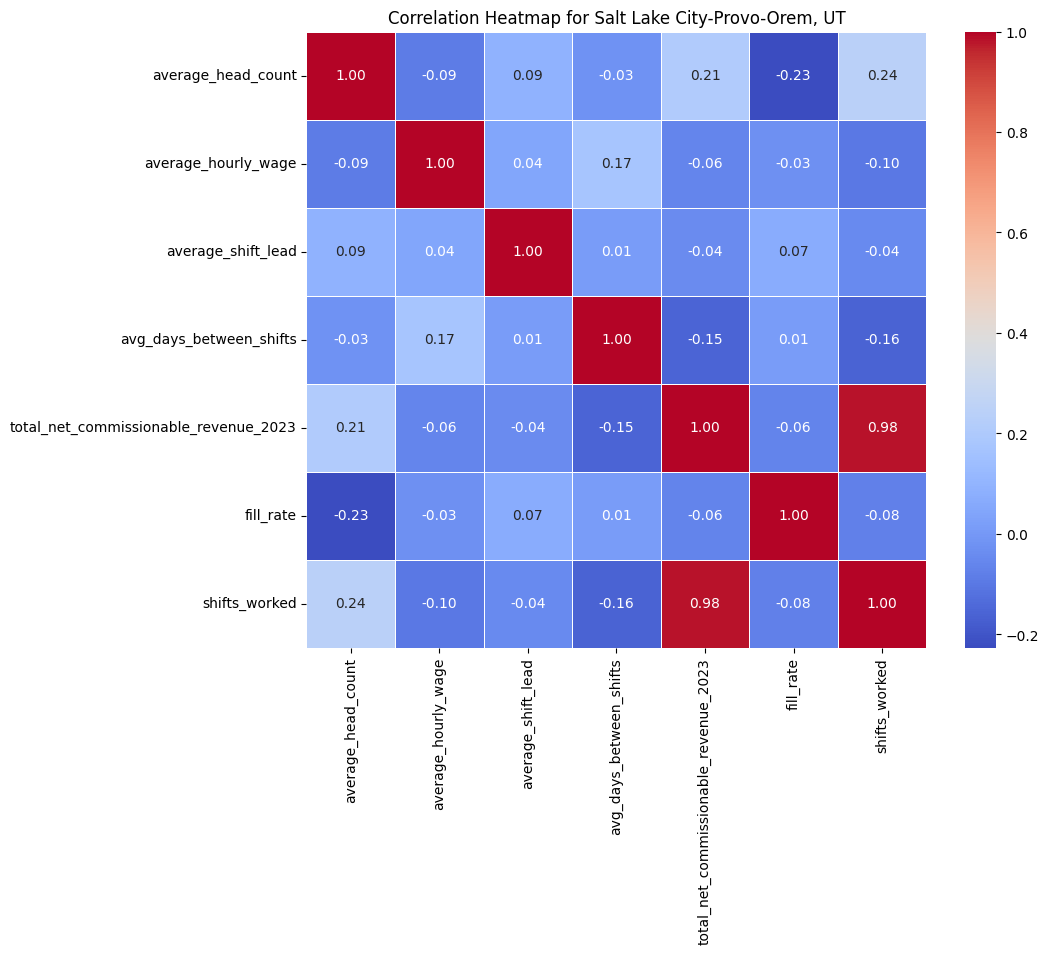

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with explanatory and response variables, including 'csa_name_mod2'
# X variables
explanatory_vars = ['industry_name', 'average_head_count', 'average_hourly_wage', 'average_shift_lead', 'avg_days_between_shifts']

# Y variables
response_vars = ['total_net_commissionable_revenue_2023', 'fill_rate', 'shifts_worked']

# Extract the subset of the DataFrame with the specified variables
selected_vars = explanatory_vars + response_vars + ['csa_name_mod2']
subset_df = df[selected_vars]

# Group by 'csa_name_mod2' and compute correlation matrices for each group
correlation_matrices = {}
for market, market_data in subset_df.groupby('csa_name_mod2'):
    # Select only numeric columns for correlation calculation
    numeric_market_data = market_data.select_dtypes(include='number')
    
    # Compute the correlation matrix for numeric columns
    correlation_matrix = numeric_market_data.corr()
    correlation_matrices[market] = correlation_matrix

# Visualize or analyze the correlation matrices for each market
for market, correlation_matrix in correlation_matrices.items():
    # Create a heatmap using Seaborn for each market
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap for {market}')
    plt.show()


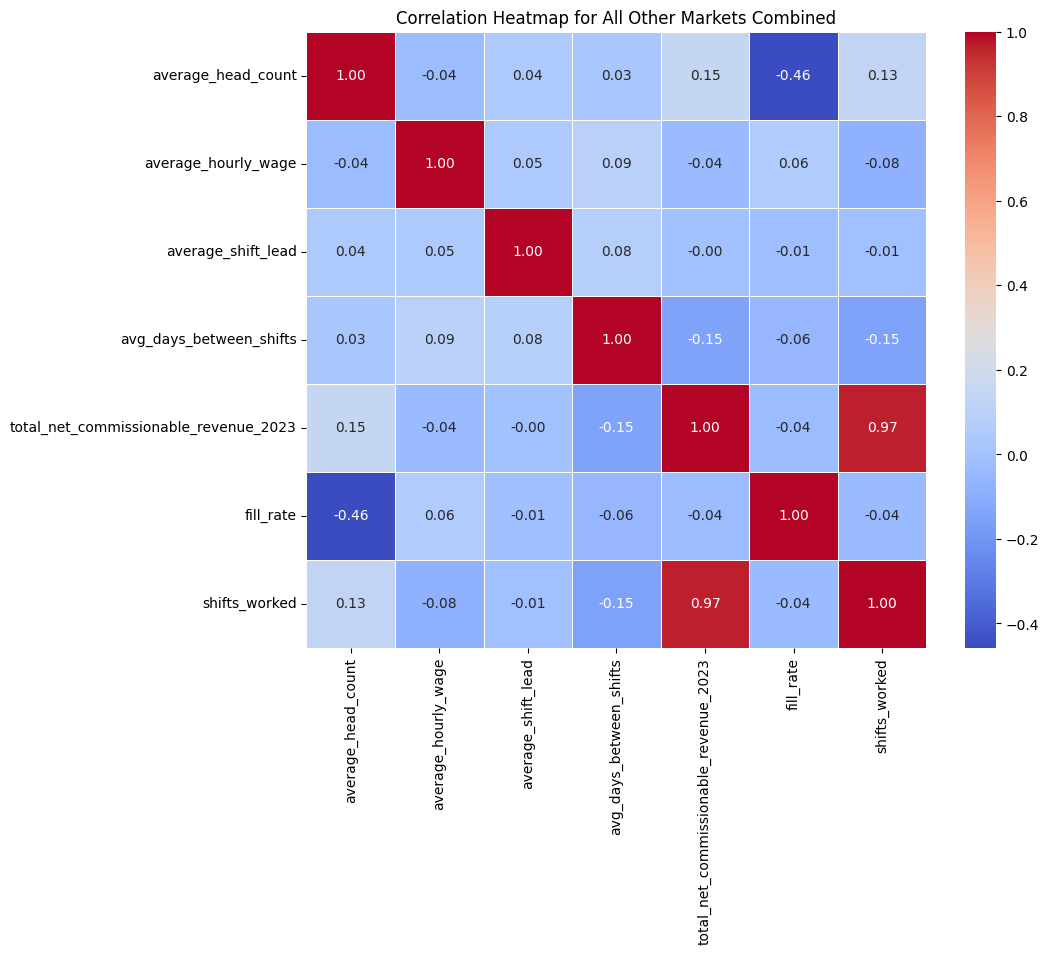

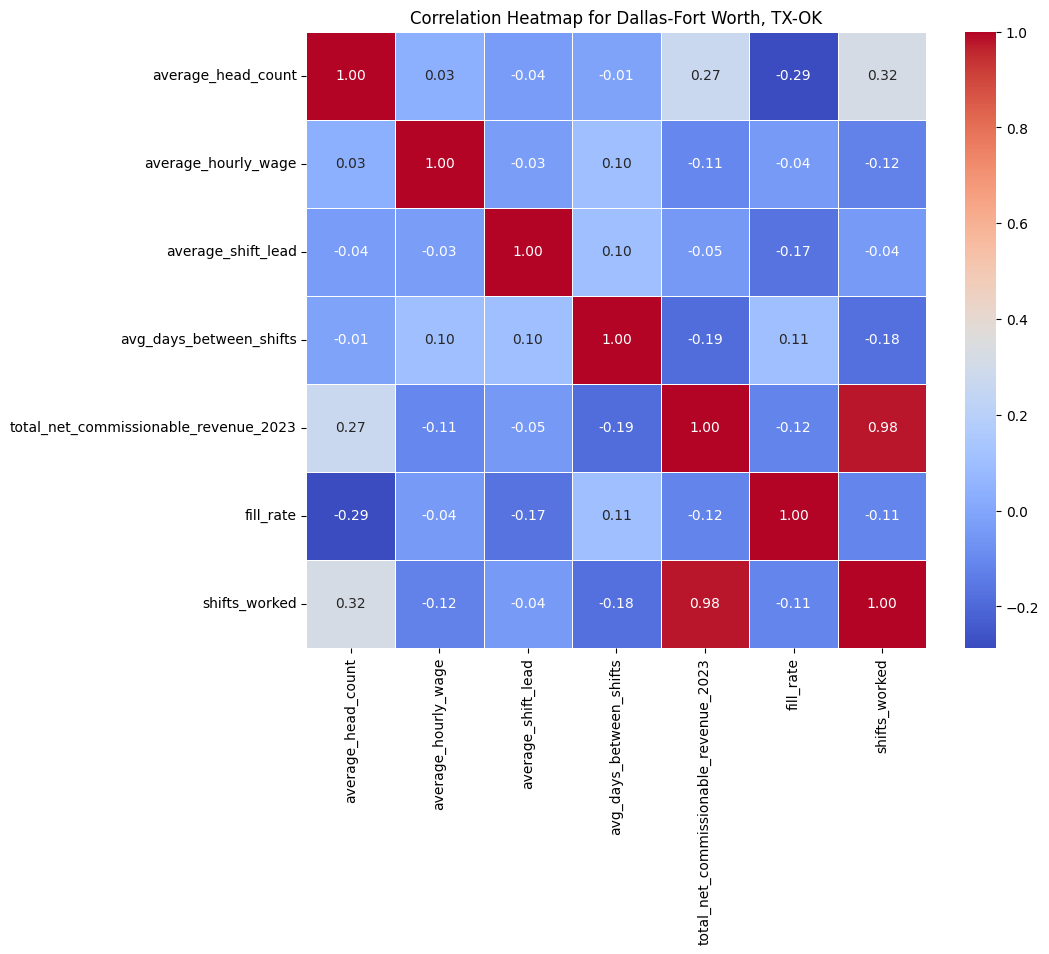

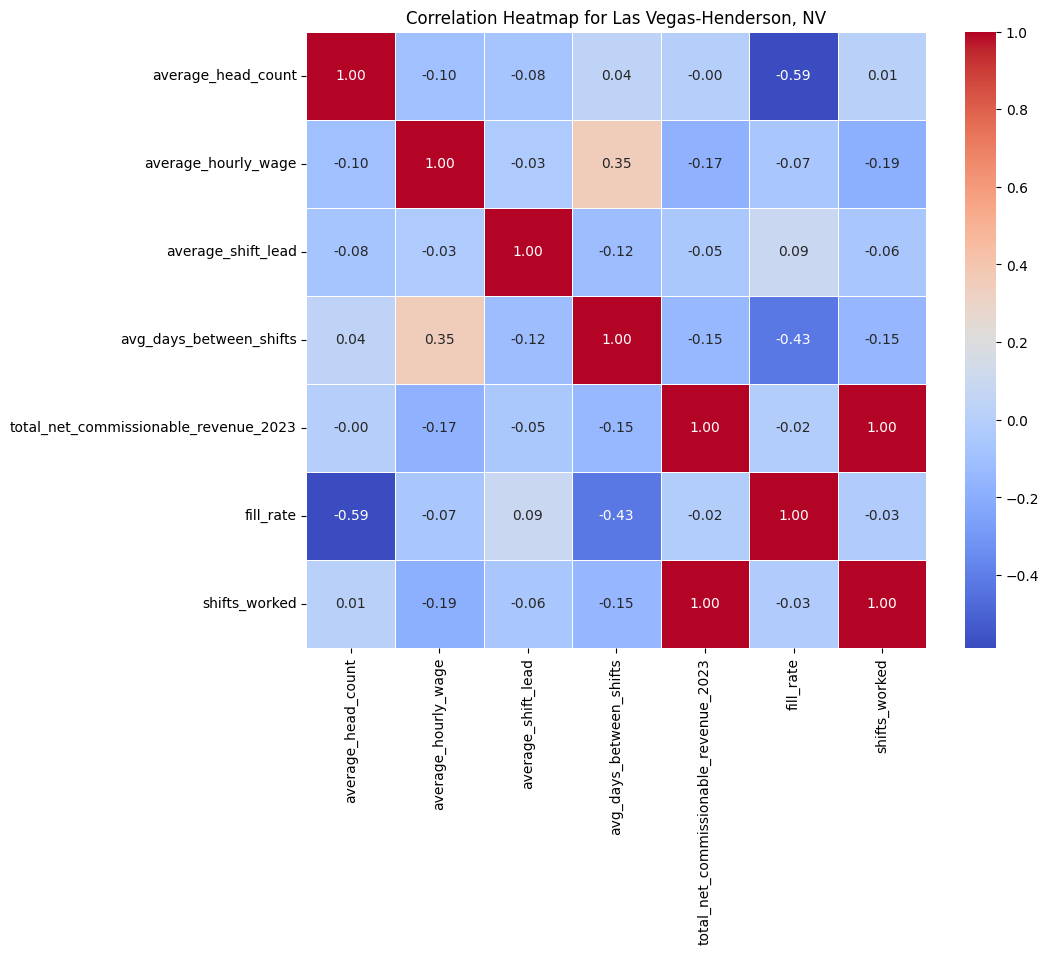

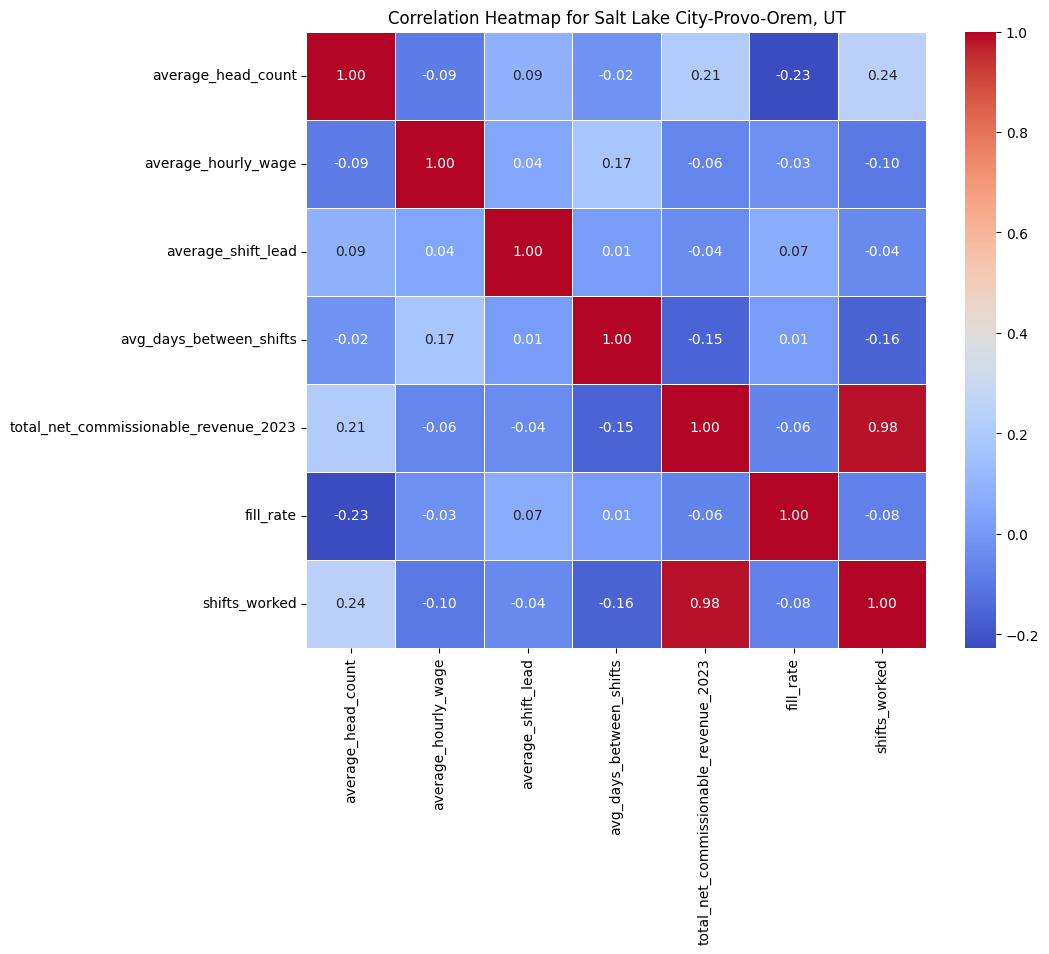

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.read_csv("not stadiumdrop.csv")

# Assuming 'df' is your DataFrame with explanatory and response variables, including 'csa_name_mod2'
# X variables
explanatory_vars = ['industry_name', 'average_head_count', 'average_hourly_wage', 'average_shift_lead', 'avg_days_between_shifts']

# Y variables
response_vars = ['total_net_commissionable_revenue_2023', 'fill_rate', 'shifts_worked']

# Extract the subset of the DataFrame with the specified variables
selected_vars = explanatory_vars + response_vars + ['csa_name_mod2']
subset_df = df2[selected_vars]

# Group by 'csa_name_mod2' and compute correlation matrices for each group
correlation_matrices = {}
for market, market_data in subset_df.groupby('csa_name_mod2'):
    # Select only numeric columns for correlation calculation
    numeric_market_data = market_data.select_dtypes(include='number')
    
    # Compute the correlation matrix for numeric columns
    correlation_matrix = numeric_market_data.corr()
    correlation_matrices[market] = correlation_matrix

# Visualize or analyze the correlation matrices for each market
for market, correlation_matrix in correlation_matrices.items():
    # Create a heatmap using Seaborn for each market
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap for {market}')
    plt.show()

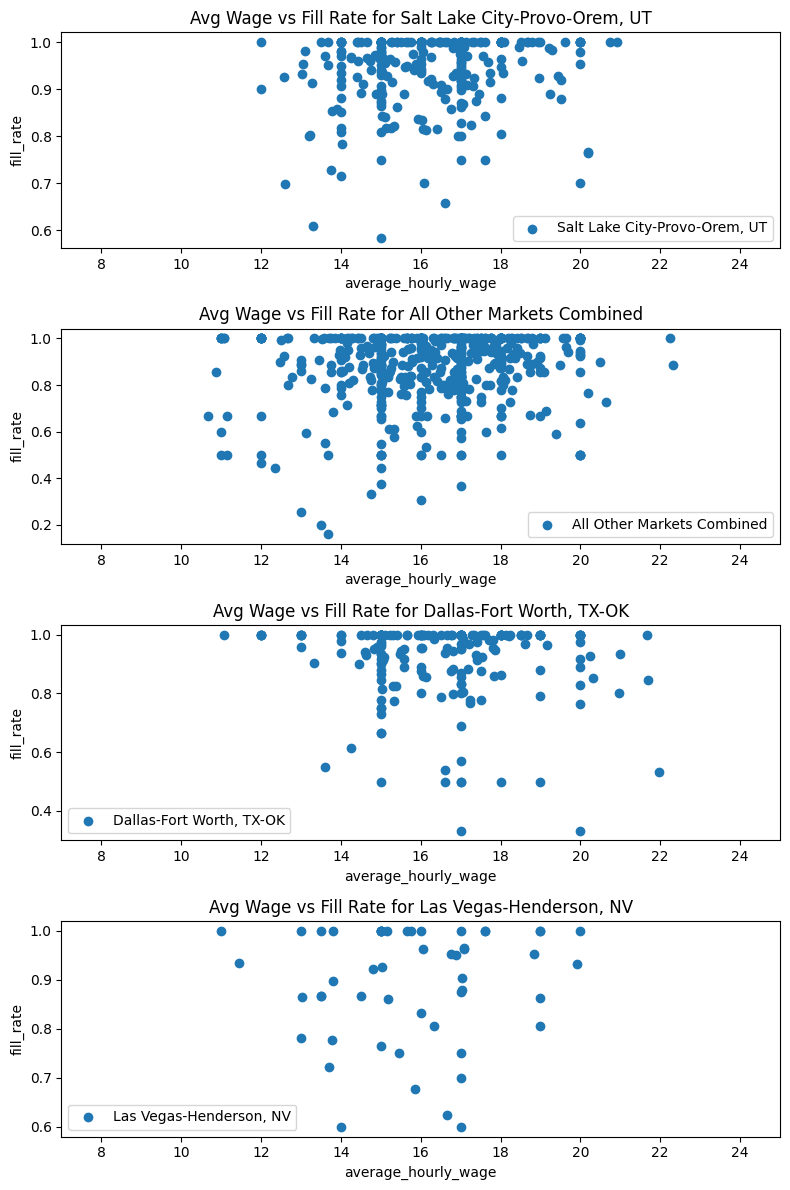

In [24]:
# Define a criterion for outlier removal (e.g., using z-scores)
z_threshold = 2 

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Remove outliers based on z-scores (adjust the criterion as needed)
    z_scores = ((subset['average_hourly_wage'] - subset['average_hourly_wage'].mean()) / subset['average_hourly_wage'].std()).abs()
    subset_no_outliers = subset[z_scores < z_threshold]

    # Create scatterplot with adjusted axis limits
    axes[i].scatter(subset_no_outliers['average_hourly_wage'], subset_no_outliers['fill_rate'], label=factor)
    axes[i].set_title(f'Avg Wage vs Fill Rate for {factor}')
    axes[i].set_xlabel('average_hourly_wage')
    axes[i].set_ylabel('fill_rate')
    axes[i].legend()
    
    # Set a specific maximum value for the x-axis
    x_limit = 25  # Adjust the value based on your desired range
    axes[i].set_xlim(7, x_limit)  # Set the x-axis limit
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


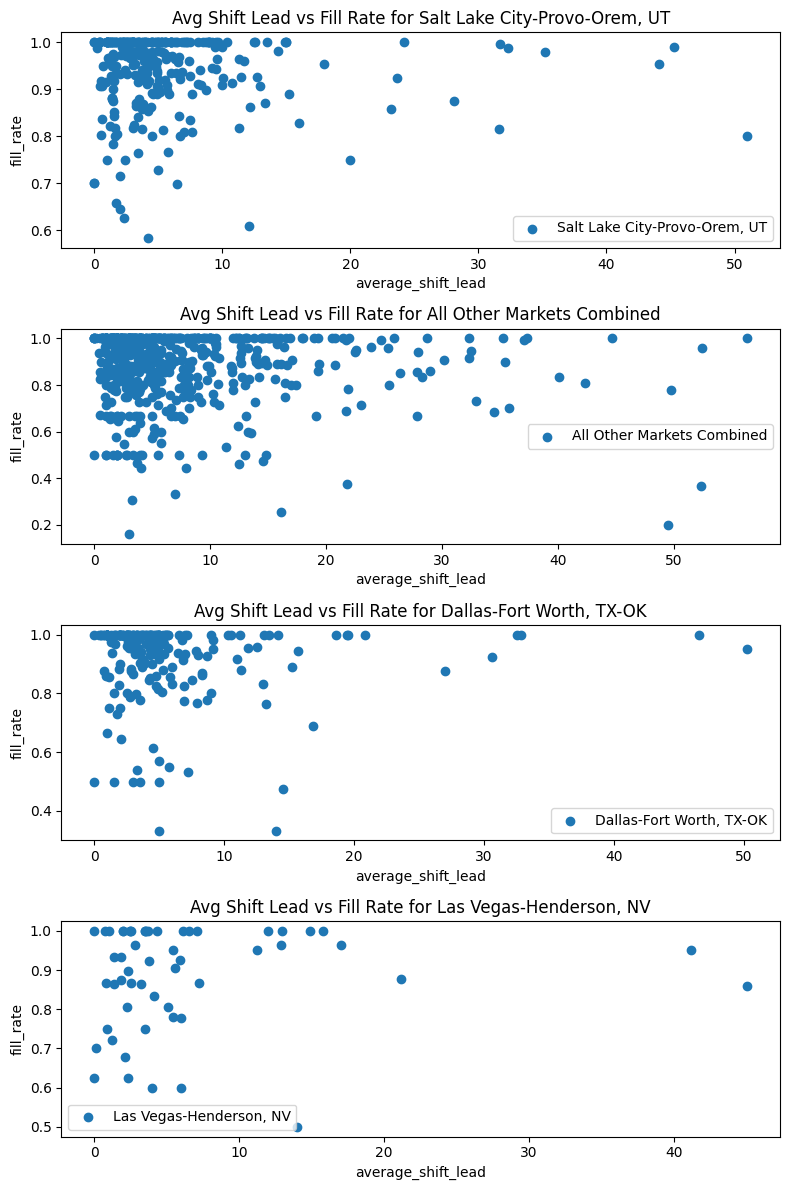

In [26]:
# Define a criterion for outlier removal (e.g., using z-scores)
z_threshold = 2 

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Remove outliers based on z-scores (adjust the criterion as needed)
    z_scores = ((subset['average_shift_lead'] - subset['average_shift_lead'].mean()) / subset['average_shift_lead'].std()).abs()
    subset_no_outliers = subset[z_scores < z_threshold]

    # Create scatterplot with adjusted axis limits
    axes[i].scatter(subset_no_outliers['average_shift_lead'], subset_no_outliers['fill_rate'], label=factor)
    axes[i].set_title(f'Avg Shift Lead vs Fill Rate for {factor}')
    axes[i].set_xlabel('average_shift_lead')
    axes[i].set_ylabel('fill_rate')
    axes[i].legend()
    
    # Set a specific maximum value for the x-axis
 #   x_limit = 25  # Adjust the value based on your desired range
#    axes[i].set_xlim(7, x_limit)  # Set the x-axis limit
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


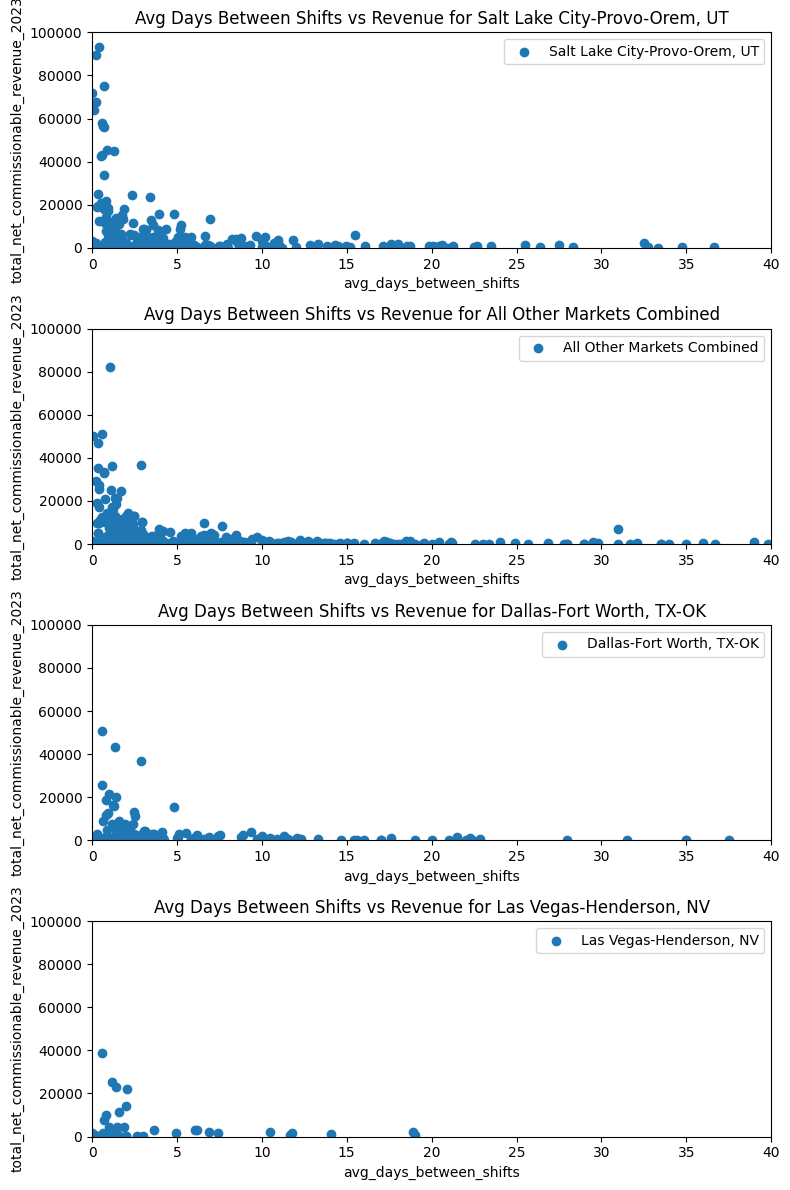

In [28]:
# Define a criterion for outlier removal (e.g., using z-scores)
z_threshold = 2 

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Remove outliers based on z-scores (adjust the criterion as needed)
    z_scores = ((subset['avg_days_between_shifts'] - subset['avg_days_between_shifts'].mean()) / subset['avg_days_between_shifts'].std()).abs()
    subset_no_outliers = subset[z_scores < z_threshold]

    # Create scatterplot with adjusted axis limits
    axes[i].scatter(subset_no_outliers['avg_days_between_shifts'], subset_no_outliers['total_net_commissionable_revenue_2023'], label=factor)
    axes[i].set_title(f'Avg Days Between Shifts vs Revenue for {factor}')
    axes[i].set_xlabel('avg_days_between_shifts')
    axes[i].set_ylabel('total_net_commissionable_revenue_2023')
    axes[i].legend()
    
    # Set a specific maximum value for the x-axis
    y_limit = 100000  # Adjust the value based on your desired range
    axes[i].set_ylim(0, y_limit)  # Set the x-axis limit
    x_limit = 40  # Adjust the value based on your desired range
    axes[i].set_xlim(0, x_limit)  # Set the x-axis limit
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


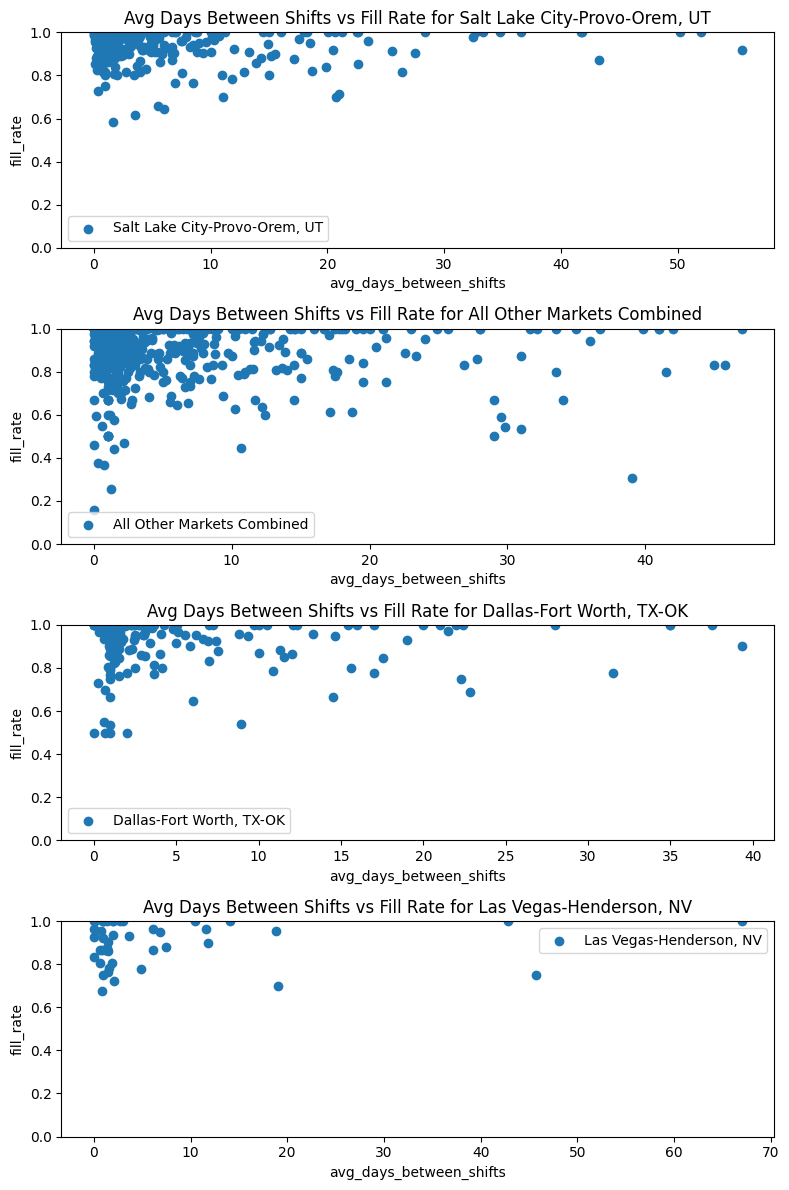

In [43]:
# Define a criterion for outlier removal (e.g., using z-scores)
z_threshold = 2 

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Remove outliers based on z-scores (adjust the criterion as needed)
    z_scores = ((subset['avg_days_between_shifts'] - subset['avg_days_between_shifts'].mean()) / subset['avg_days_between_shifts'].std()).abs()
    subset_no_outliers = subset[z_scores < z_threshold]

    # Create scatterplot with adjusted axis limits
    axes[i].scatter(subset_no_outliers['avg_days_between_shifts'], subset_no_outliers['fill_rate'], label=factor)
    axes[i].set_title(f'Avg Days Between Shifts vs Fill Rate for {factor}')
    axes[i].set_xlabel('avg_days_between_shifts')
    axes[i].set_ylabel('fill_rate')
    axes[i].legend()
    y_limit = 1  # Adjust the value based on your desired range
    axes[i].set_ylim(0, y_limit)  # Set the x-axis limit

    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


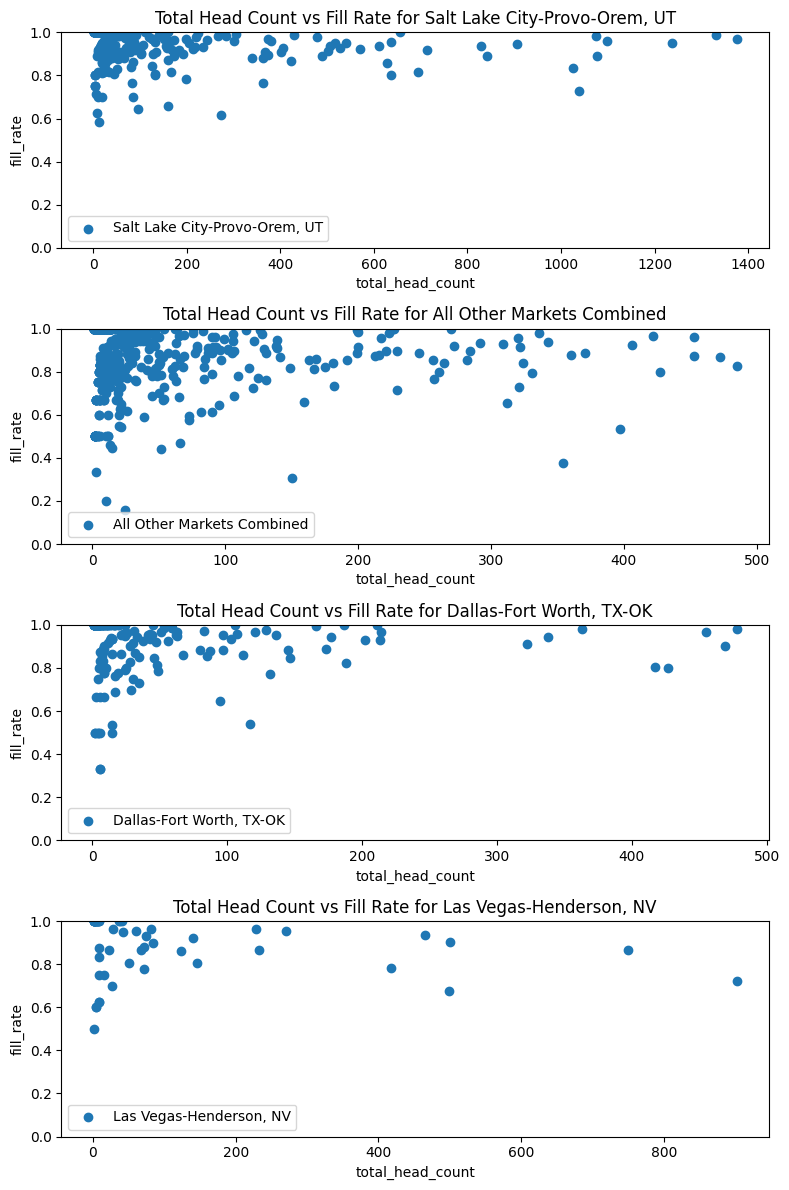

In [44]:
# Define a criterion for outlier removal (e.g., using z-scores)
z_threshold = 2 

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Remove outliers based on z-scores (adjust the criterion as needed)
    z_scores = ((subset['total_head_count'] - subset['total_head_count'].mean()) / subset['total_head_count'].std()).abs()
    subset_no_outliers = subset[z_scores < z_threshold]

    # Create scatterplot with adjusted axis limits
    axes[i].scatter(subset_no_outliers['total_head_count'], subset_no_outliers['fill_rate'], label=factor)
    axes[i].set_title(f'Total Head Count vs Fill Rate for {factor}')
    axes[i].set_xlabel('total_head_count')
    axes[i].set_ylabel('fill_rate')
    axes[i].legend()
    y_limit = 1  # Adjust the value based on your desired range
    axes[i].set_ylim(0, y_limit)  # Set the x-axis limit

    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

# Define a threshold distance (adjust as needed)
threshold_distance = 1000

# Define a threshold for x values (adjust as needed)
y_threshold = 0.6

# Average Time Inbetween Shifts vs Revenue
unique_factors = df['csa_name_mod2'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(unique_factors), ncols=1, figsize=(8, 3 * len(unique_factors)))

for i, factor in enumerate(unique_factors):
    subset = df[df['csa_name_mod2'] == factor]

    # Calculate means
    mean_x = subset['total_head_count'].mean()
    mean_y = subset['fill_rate'].mean()

    # Calculate Euclidean distance from each point to the mean
    subset['distance'] = np.sqrt((subset['total_head_count'] - mean_x)**2 + (subset['fill_rate'] - mean_y)**2)

    # Create scatterplot with adjusted axis limits
    scatter = axes[i].scatter(subset['total_head_count'], subset['fill_rate'], label=factor)
    axes[i].set_title(f'Scatterplot for {factor}')
    axes[i].set_xlabel('total_head_count')
    axes[i].set_ylabel('fill_rate')
    axes[i].legend()

    axes[i].set_ylim(0, 1)  # Set the x-axis limit

    # Label points that exceed the threshold distance or have an x value below 0.7
    labeled_points = subset[(subset['distance'] > threshold_distance) | (subset['fill_rate'] < y_threshold)]
    for _, row in labeled_points.iterrows():
        axes[i].annotate(row['company_name'], (row['total_head_count'], row['fill_rate']), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined